# Price Prediction of an online marketplace 

## Introduction 

In this project, the goal is to pridict the price of items that are listed on Mercari marketplace so that when a seller attemps to place their items on the website, they get a suggested price automatically. In the first phase of the project, we start by looking into the data sets we are given. The sets are from www.kaggle.com and the sets are found here: 
https://www.kaggle.com/saitosean/mercari/version/1
Since the data set is from Kaggle, the test set does not have the price. Therefore, we will only work with the train set and in the Machine Learning phase, we will split the train set into test and train. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import scipy as sp
import math
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
#import contractions
import unicodedata
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
import pylab
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.weightstats import ztest
from matplotlib import rcParams
import xlrd
import csv  
import os

In [2]:
f_1 = open(os.path.expanduser('~/Downloads/mercari/test.tsv'))

In [3]:
f_2 = open(os.path.expanduser('~/Downloads/mercari/train.tsv'))

In [4]:
df_1 = pd.read_csv(f_1, sep="\t")

In [5]:
df_1.columns

Index(['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description'],
      dtype='object')

#### The following are a brief explanation of the attributes we have in our dataset: 
+ train_id — the id of the listing (we will drop this column in the next cells, mainly to reduce dimentionality since it won't serve us in our study)
+ name — the title of the listing as it appears on the item profile. 
+ item_condition_id — the condition of the items provided by the sellers; 1 is New With Tags, all the way to 5 as the condition gets worse. 
+ category_name — category of the listing (we will split up the category name in this project to create more similarities in seemingly different categories). 
+ brand_name — the name of the brand for the item on sale. 
+ price — the price that the item was sold for. This is target variable that we will predict in this study. 
+ shipping — 1 if shipping fee is paid by seller and 0 if shipping is paid by buyer
+ item_description — the full description of the item as it appears on the item profile. 

#### Let's look through the data sets and see the tables visually. 

In [6]:
df_1.dtypes

test_id               int64
name                 object
item_condition_id     int64
category_name        object
brand_name           object
shipping              int64
item_description     object
dtype: object

In [7]:
df_1.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined with bubble wrap for protection Self Sealing (peel-and-seal), adhesive keeps contents secure and tamper proof Durable and lightweight Kraft material ..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coach outlet.
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and perfect for hot weather
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,"Rediscovering life after the loss of a loved one by Tony Cooke. Paperback in good condition 2003. ❤ ❤ Bundle and save! ❤ ❤ Book, death, grief, bereavement SHLF.SW.5.15"


In [6]:
df_1 = df_1.drop(['test_id'], axis=1)

In [9]:
df_1.describe()

,item_condition_id,shipping
count,693359.000000,693359.000000
mean,1.906102,0.447719
std,0.903378,0.497260
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,1.000000
max,5.000000,1.000000


In [10]:
df_1.shape

(693359, 6)

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 6 columns):
name                 693359 non-null object
item_condition_id    693359 non-null int64
category_name        690301 non-null object
brand_name           397834 non-null object
shipping             693359 non-null int64
item_description     693359 non-null object
dtypes: int64(2), object(4)
memory usage: 31.7+ MB


# Exploratory Data Analysis 

+ The Train set has a price attribute, which we mainly focus on during this project.  
+ In the next following cells, we start looking into different attributes in the Train data set and start exploring the data.

In [7]:
df_2 = pd.read_csv(f_2, sep="\t")

We can see that the attributes are the following: 

In [8]:
df_2.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In the next cells, we will drop the `train_id` feature. 

In [9]:
df_2.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [10]:
df_2.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52.0,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [10]:
df_2 = df_2.drop(['train_id'], axis=1)


In [12]:
df_2.describe()

,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06
mean,1.907380e+00,2.673752e+01,4.472744e-01
std,9.031586e-01,3.858607e+01,4.972124e-01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+01,0.000000e+00
50%,2.000000e+00,1.700000e+01,0.000000e+00
75%,3.000000e+00,2.900000e+01,1.000000e+00
max,5.000000e+00,2.009000e+03,1.000000e+00


In [13]:
df_2.shape

(1482535, 7)

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 7 columns):
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 79.2+ MB


Looking at the data types, it looks like everything is in the type we want it to be. Now, let's look into the different attributes more closely. 

In [20]:
df_2['name'].unique()

array(['MLB Cincinnati Reds T Shirt Size XL',
       'Razer BlackWidow Chroma Keyboard', 'AVA-VIV Blouse', ...,
       '21 day fix containers and eating plan', 'World markets lanterns',
       'Brand new lux de ville wallet'], dtype=object)

In [21]:
len(df_2['name'].unique())

1225273

We have over one million unique names in our data set. 

In [22]:
df_2['brand_name'].unique()

array([nan, 'Razer', 'Target', ..., 'Astroglide', 'Cumberland Bay',
       'Kids Only'], dtype=object)

In [23]:
len(df_2['brand_name'].unique())

4810

The following is the top 5 brand names in our data. 

In [24]:
df_2['brand_name'].value_counts().head()

PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
Name: brand_name, dtype: int64

### Top 20 brand names are as follows:

In [11]:
df_2['brand_name'].value_counts()[:10]
                               

PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
FOREVER 21           15186
Nintendo             15007
Lululemon            14558
Michael Kors         13928
American Eagle       13254
Name: brand_name, dtype: int64

Now, let's take a look at the `item_condition_id` attribute in the dataset. The `item_condition_id` goes from 1 to 5 in the order of New With Tags to Used. 

In [26]:
df_2['item_condition_id'].unique()

array([3, 1, 2, 4, 5])

In [27]:
len(df_2['item_condition_id'].unique())

5

Now, let's look at the `shipping` attribute in the data set.  The shipping status of 0 means that the shipping fee is by the buyer and shipping status of 1 means that the shipping fee is paid by the seller. 

In [28]:
df_2['shipping'].unique()

array([1, 0])

In [29]:
len(df_2['price'].unique())

828

There are 828 unique prices in the `price` feature, with the max, min, mean and standard deviation of: 

In [30]:
df_2['price'].max()

2009.0

In [31]:
df_2['price'].min()

0.0

In [32]:
df_2['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

Now, let's take a look at the `category_name` in the data set.

In [33]:
df_2['category_name'].unique()

array(['Men/Tops/T-shirts',
       'Electronics/Computers & Tablets/Components & Parts',
       'Women/Tops & Blouses/Blouse', ..., 'Handmade/Jewelry/Clothing',
       'Vintage & Collectibles/Supplies/Ephemera',
       'Handmade/Pets/Blanket'], dtype=object)

In [34]:
len(df_2['category_name'].unique())

1288

The following is the top 5 `category_name` in the data: 

In [35]:
df_2['category_name'].value_counts().head()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
Name: category_name, dtype: int64

The list of the top 20 'category_name' in the marketplace in the descending order is:  

In [9]:
df_2['category_name'].value_counts().head()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
Name: category_name, dtype: int64

As we can see, almost all these categories are a few subcategories bundled up together. In the next cells, we are planning to take them apart in the next few phases of this project. 

Now, let's take a look at the `shipping` attribute: 

In [37]:
df_2['shipping'].unique()

array([1, 0])

There are 2 types of `shipping` corresponding to: 
#### Free Shipping, yes --> 1
#### Free Shipping, no --> 0

In [38]:
df_2['shipping'].value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

As we see, we have the following ratio for different types of `shipping`s. 

In [39]:
df_2['shipping'].value_counts()/len(df_2['shipping'])

0    0.552726
1    0.447274
Name: shipping, dtype: float64

About 45% of the items are free shipping. 

In [40]:
len(df_2['shipping'] == 1) + len(df_2['shipping'] == 0)   

2965070

Let's delve into the different types of `shipping` and see the average `price` of different `shipping` types; As we see, the average `price` for free `shipping` is $22.57. 

While, the average `price` when the buyer pays for `shipping` is  $30.11.

In [41]:
df_2.loc[df_2['shipping']==0, 'price'].mean()  #buyer pays the shipping

30.111777627267568

In [42]:
df_2.loc[df_2['shipping']==1, 'price'].mean()  #seller pays the shipping

22.56772583320766

In [43]:
df_2['price'].sort_values(ascending=False).head()

760469     2009.0
1262245    2006.0
1393600    2004.0
1445348    2000.0
742113     2000.0
Name: price, dtype: float64

In [44]:
df_2.groupby(['shipping']).describe()

item_condition_id                                               \
                     count      mean       std  min  25%  50%  75%  max   
shipping                                                                  
0                 819435.0  2.062683  0.897946  1.0  1.0  2.0  3.0  5.0   
1                 663100.0  1.715462  0.872159  1.0  1.0  1.0  2.0  5.0   

             price                                                      
             count       mean       std  min   25%   50%   75%     max  
shipping                                                                
0         819435.0  30.111778  39.53592  0.0  13.0  20.0  33.0  2009.0  
1         663100.0  22.567726  36.95579  0.0   8.0  14.0  25.0  2000.0

##### Let's see how many missing values we have in our dataset in our various attributes. 

In [45]:
df_2.isnull().sum()

name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

# Data Visualization

In this phase of the project, we visualize the data through different types of graphs. 

#### The bar graphs of top`brand_name`  in the marketplace based on the data set we are working with: 

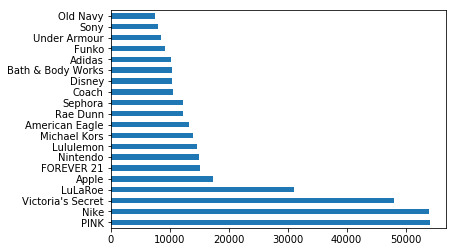

In [46]:
df_2['brand_name'].value_counts()[:20].plot(kind='barh')  

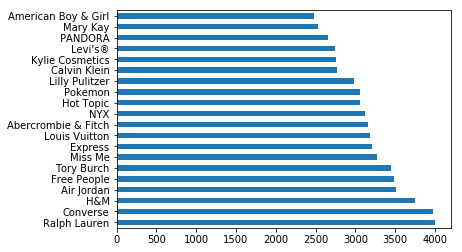

In [47]:
df_2['brand_name'].value_counts()[40:60].plot(kind='barh')  

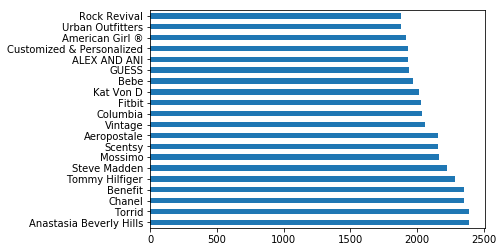

In [48]:
df_2['brand_name'].value_counts()[60:80].plot(kind='barh')  

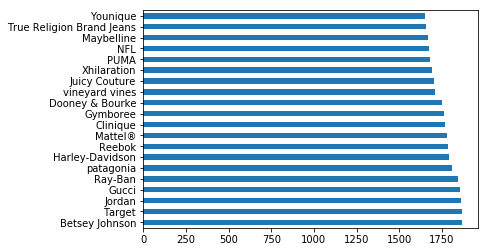

In [49]:
df_2['brand_name'].value_counts()[80:100].plot(kind='barh')  

#### Histogram of the distribution of price in the data set: 

#### As we can see from the left histogram, the price is skewed to the right. The right histogram shows the logarithm of the attribute `price` and we see that it's normally distributed. 

Text(0.5, 1.0, 'Price Distribution')

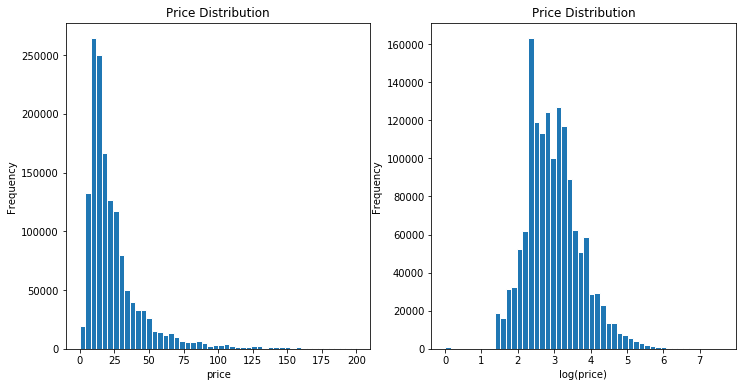

In [50]:
plt.subplot(1, 2, 1)
(df_2['price']).plot.hist(bins=50, range = [0, 200], edgecolor = 'white')  
plt.xlabel('price')   
plt.title('Price Distribution')
plt.subplot(1, 2, 2)
np.log(df_2['price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white' ) 
plt.xlabel('log(price)')  
plt.title('Price Distribution')

#### Now, let's see the relationship between `price` and the top `category_name`: 

In [51]:
df_2[df_2['category_name'] == 'Women/Athletic Apparel/Pants, Tights, Leggings']['price'].max()  
#max price in that category 


600.0

In [52]:
df_2[df_2['category_name'] == 'Women/Athletic Apparel/Pants, Tights, Leggings']['price'].describe()
# more stats about the Women/Athletic category: 

count    60177.000000
mean        34.392733
std         24.404239
min          0.000000
25%         18.000000
50%         29.000000
75%         44.000000
max        600.000000
Name: price, dtype: float64

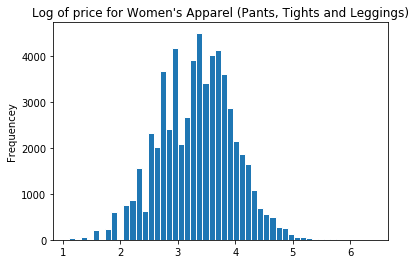

In [53]:
plt.hist(np.log(df_2[df_2['category_name'] == 'Women/Athletic Apparel/Pants, Tights, Leggings']['price'][df_2['price'] != 0]),bins=50, edgecolor='white')  
# and it's a normal distribution!
#the log tranform of it makes it noraml distributed  #when in doubt take a log! lol 
plt.title("Log of price for Women's Apparel (Pants, Tights and Leggings)")
plt.ylabel("Frequencey")
plt.show()


#### The violin distribution for `price`: 

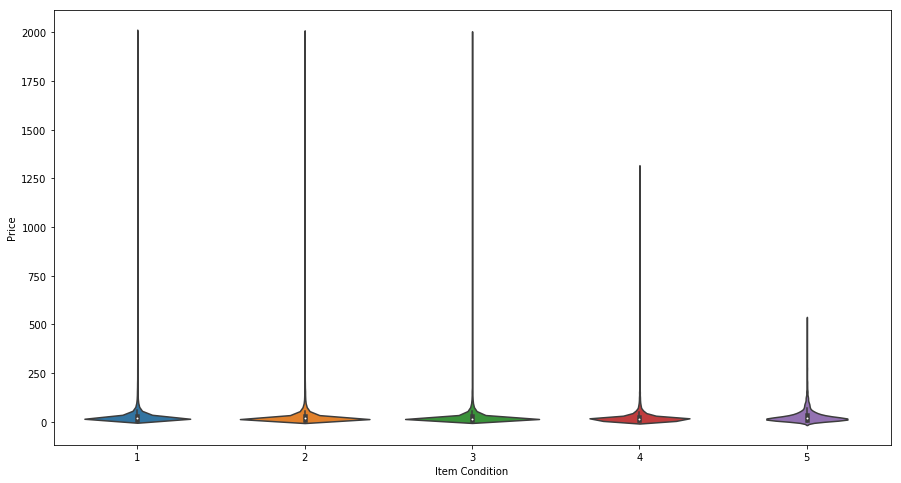

In [53]:
plt.figure(figsize=(15,8)) 
sns.violinplot( y = df_2.price, x= df_2['item_condition_id'])
plt.xlabel('Item Condition')
plt.ylabel('Price')
plt.show()

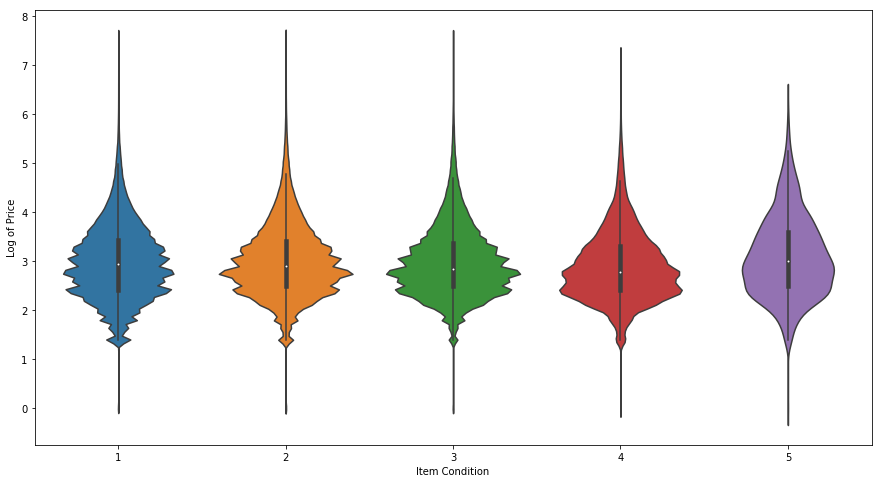

In [54]:
plt.figure(figsize=(15,8)) 
sns.violinplot( y = np.log(df_2['price'] +1) , x= df_2['item_condition_id'], data = df_2)
plt.xlabel('Item Condition')
plt.ylabel('Log of Price')
plt.show()

#### Box Plots of log of `price` and the `item_condition_id`: 

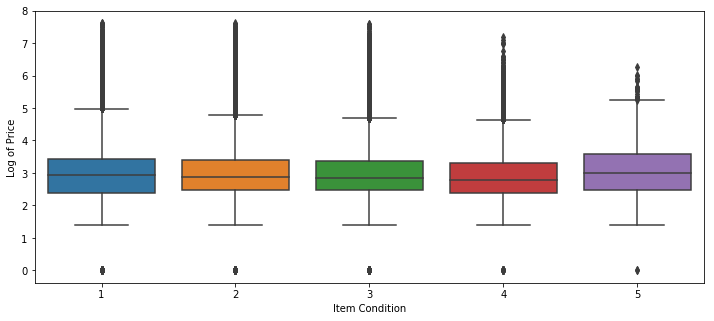

In [55]:
plt.figure(figsize=(12,5)) 
sns.boxplot(x ='item_condition_id', y = np.log(df_2['price']+1), data = df_2)
plt.xlabel('Item Condition')
plt.ylabel('Log of Price')
plt.show()

#### Top most `price` s in the marketplace: 

In [10]:
df_2.price.value_counts().head()


10.0    99416
12.0    78986
14.0    76655
16.0    66413
9.0     63643
Name: price, dtype: int64

In [55]:
len(df_2[df_2['price'] < 250.0])


1476089

In [56]:
len(df_2[df_2['price'] < 100.0])

1438222

#### The following are various bar charts for the frequency of the `category_name` attribute. 

+ The main category name in the marketplace is Women Apparel/Pants, Tights, Leggings followed by Women/Tops & Blouses/T-Shirts.  

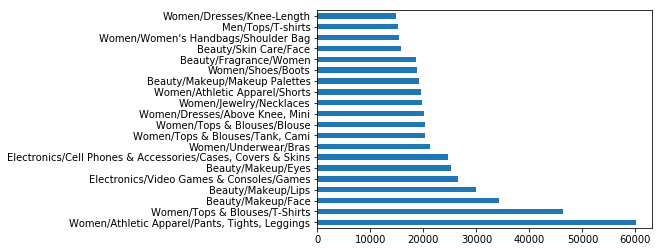

In [57]:
df_2['category_name'].value_counts()[:20].plot(kind='barh')  

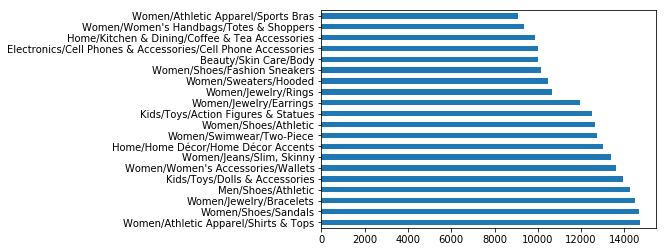

In [58]:
df_2['category_name'].value_counts()[20:40].plot(kind='barh')  

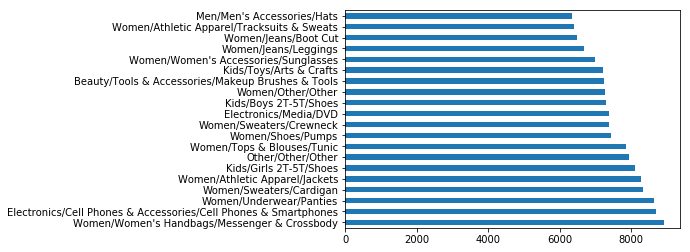

In [59]:
df_2['category_name'].value_counts()[40:60].plot(kind='barh')  

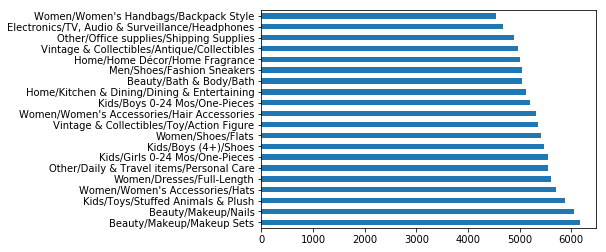

In [60]:
df_2['category_name'].value_counts()[60:80].plot(kind='barh')  

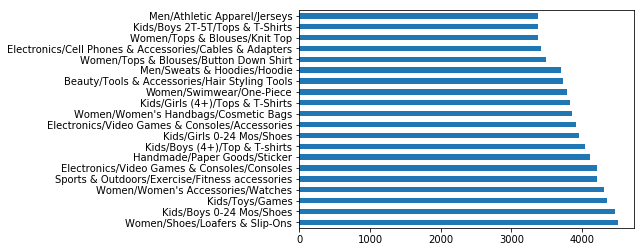

In [61]:
df_2['category_name'].value_counts()[80:100].plot(kind='barh')  

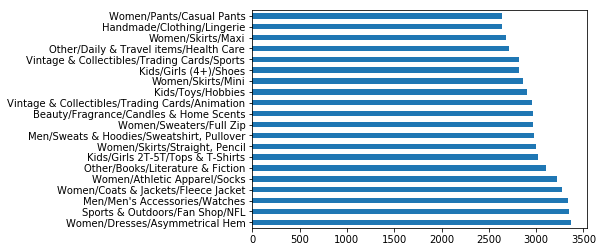

In [62]:
df_2['category_name'].value_counts()[100:120].plot(kind='barh')  

#### The following is the graph of distributions of `price` for different `shipping` types 

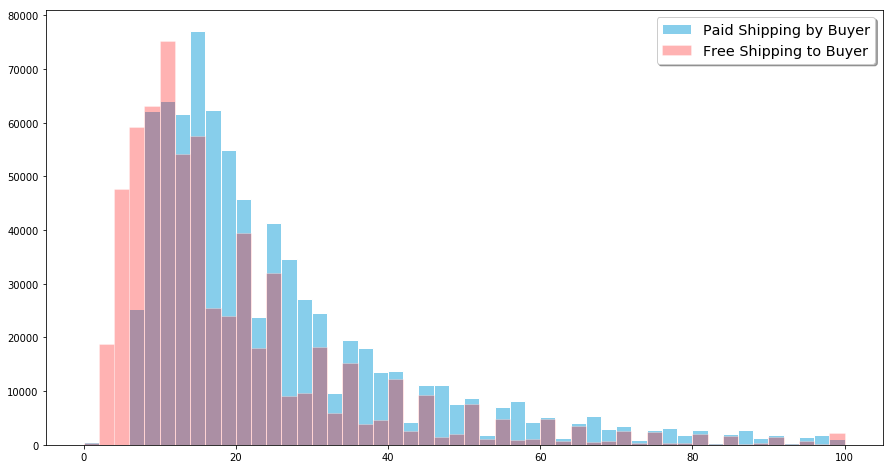

In [63]:
fig = plt.figure(figsize=(15,8)) 
plt.hist(df_2.loc[df_2['shipping']==0, 'price'], bins=50, edgecolor='white', range = [0, 100], color = "skyblue",  alpha=1.0, label='Paid Shipping by Buyer')
plt.hist(df_2.loc[df_2['shipping']==1, 'price'], bins=50, edgecolor='white', range = [0, 100], color = "red",  alpha=0.3, label='Free Shipping to Buyer')
plt.legend(loc='upper right', shadow=True,  fontsize='x-large')
plt.show()

### Seems like, overall, the price of the items when it's free shipping is less expensive. Namely, more expensive items are paid by the buyer. 



### Let's take a look at how many rows have `price` =0


In [12]:
len(df_2[df_2['price'] == 0])

874

In [13]:
### We are going to drop these rows

df_2 = df_2[df_2['price'] != 0]

In [14]:
df_2.shape

(1481661, 7)

+ The following is the Null values for different attributes in the dataset. 
##### category_name    --->       6327
##### brand_name       --->    632682
##### item_description --->         4
+ We are going to replace all the NaN's to noname in `brand_name` and then start preparing the dataset for machine learning. 

Here, I am replacing all the NaN's in `brand_name` and `categorgy_name` with "noname"

In [15]:
df_2['brand_name'] = df_2['brand_name'].replace(np.nan, 'noname')

In [16]:
df_2['category_name'] = df_2['category_name'].replace(np.nan, 'noname')

## Data Preparation for Machine Learning

#### Now, we convert the `category_name` , `item_condition_id` and `brand_name` columns into a dummie variable. 

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [18]:
cat_name = pd.get_dummies(pd.Series(df_2['category_name'].str.split('/')).apply(pd.Series).stack() ) .sum(level=0)

In [70]:
cat_name.head()

,100 Years or Older,50 To 75 Years,75 To 100 Years,A-Line,"Above Knee, Mini",Accessories,Accessory,Aceo,Action Figure,Action Figures & Statues,"Action, Adventure",Activity Centers & Entertainers,Advertisement,Afghan,Air Conditioners,Air Fresheners,Air Purifiers,All Other Sports,Amplifiers & Effects,Animal,Animals,Animation,Antique,Apparel,Apron,Area Rugs & Pads,Art,Art Doll,Artist Bears,Arts & Crafts,Arts & Photography,Artwork,Asymmetrical,Asymmetrical Hem,Athletic,Athletic Apparel,Athletic Training,Automotive,Automotive Enthusiast Merchandise,Baby,Baby & Child Care,Baby & Toddler Toys,Baby Gyms & Playmats,Baby Seats,Backpack,Backpack Style,Backpacks & Carriers,"Backpacks, Bags & Briefcases",Badminton,"Baggy, Loose",Bags & Cases,Bags and Purses,Baguette,Bakeware,Ballet,Band & Orchestra,Baseball,Baseball & Softball,Basic Supplies,Basket,Basketball,Baskets,Baskets & Bins,Bass Guitars,Bath,Bath & Body,Bath Linen Sets,Bath Rugs,Bathing & Skin Care,Bathing Accessories,Bathing Tubs & Seats,Bathroom,Bathroom Accessories,Bathroom Furniture,Bathroom Furniture Sets,Bathroom Safety,Bathroom Shelves,Bathroom Storage & Organization,Batteries,Beach Accessories,Bead,Beading,Beads,Bear,Beauty,Bed,Bed Pillows,Bed in a Bag,Bedding,Bedroom Furniture,Bedspreads & Coverlets,Belt,Belts,Bicycle Child Seats & Trailers,Bike & Skate,Binoculars & Telescopes,Biographies & Memoirs,Biography,Birthday,Blanket,Blankets & Throws,Blazer,Blazers & Sport Coats,Block,Blouse,Blu-Ray,Board Shorts,"Board, Surf",Boating,Body,Bomber,Book,Bookmark,Books,Books and Zines,Boot Cut,Boots,Bottle-Feeding,Bottles,Bottoms,Bouquets,Bowl,Bowling,Bowls,Box,Boxes,Boxing & MMA,Boyfriend,Boys,Boys (4+),Boys 0-24 Mos,Boys 2T-5T,Bracelet,Bracelets,Bras,Brass Instruments,Breastfeeding,Breastfeeding Pillows & Stools,Brooch,Brushes,Brushes & Applicators,Bubble,Bubble Bath,Buckle,Building Toys,Burning,Business & Money,Butter Dish,Button,Button Down Shirt,Button-Front,CD,Cabinet Locks & Straps,Cables & Adapters,Cabochon,Cage,Cake Toppers,Calendar,Calendars,Camcorders,Camera,Camera & Photo Accessories,Cameras & Photography,Candle Holder,Candles,Candles & Holders,Candles & Home Scents,Cape,"Capri, Cropped","Capris, Cropped",Car,"Car Audio, Video & GPS",Car Care,Car Electronics & Accessories,Car Seats,Car Seats & Accessories,Car Security & Convenience,Car Speakers & Systems,Car Stereos & Components,Car Subwoofers,Car Video,Cardigan,Cards,Cargo,Carpenter,"Carpenter, Utility",Carving,Case,"Cases, Covers & Skins",Casserole,Casual Pants,Casual Shorts,Cell Phone Accessories,Cell Phones & Accessories,Cell Phones & Smartphones,Ceramic,Ceramics and Pottery,Chain,Chair,Change Purse,Changing Kits,Changing Pads & Covers,Chargers & Cradles,Charm,Child Friendly,Children,Children's Books,Christian Books & Bibles,Christmas,"Classic, Straight Leg",Cleaning,Cleaning Supplies,Cleansers,Cleats,Clock,Clocks,Cloth Diapers,Clothing,Clothing & Closet Storage,Clutch,Coaster,Coasters,Coats & Jackets,Coffee & Tea Accessories,Collages,Collar,Collared,Collectibles,Comforters & Sets,Comic,Comics,Compact,Competitive Swimwear,Components & Parts,Computers & Tablets,Conditioners,Consoles,Cookbook,Cookware,Corduroys,Corset,Cosmetic Bags,Costume,Cotton & Swabs,Cover-Ups,Cowl Neck,Cozy,Crafting,Cream and Sugar Set,Crewneck,...,RV Parts & Accessories,"Racks, Shelves & Drawers",Radio,Raincoat,Rainwear,Reference,Refrigerators,Relaxed,Religion,Religion & Spirituality,Religious,Replacement Parts,Replacement Parts & Tools,Ring,Rings,Safety,Safety Caps,Salt and Pepper Shakers,Sandals,Satchel,Scale Dollhouse Miniature,Scale Models,Scarf,Scarves & Wraps,School Supplies,"Sci-Fi, Fantasy",Science,Science & Math,Scifi,Scoop Neck,Scrapbooking,Screen Protectors,Scrubs & Body Treatments,Sculptures,Seasonal,Seasonal Décor,Seat Covers,Serving,Sets,Sets & Kits,Sewing,Shampoo,Shampoo & Conditioner Sets,Shampoo Plus Conditioner,Shampoos,"Shams, Bed Skirts & Bed Frame Draperies",Shawl,Sheets & Pillowcases,Shelf,Shipping Supplies,Shirt,Shirts & Tops

In [19]:
brand_name = pd.get_dummies(pd.Series(df_2['brand_name'].str.split('/')).apply(pd.Series).stack()).sum(level=0)

In [100]:
brand_name.head()

,Hit Ent.,!iT Jeans,% Pure,10.Deep,191 Unlimited,1byone,21men,24,2K Games,2XU,3.1 Phillip Lim,3M®,47,47 Brand,5.11 Tactical,525 America,5th & Ocean,7 Comfort Apparel,7 Diamonds,7 For All Mankind®,8732 Apparel,90 Degree By Reflex,A,A Bathing Ape,A Pea In The Pod,A Plus Child Supply,A Wish Come True,A&A Optical,A&E,A&R Sports,A+D,A-Shirt,A. Byer,A.B.S. by Allen Schwartz,A.D. Sutton & Sons,A.K.A,A.L.C.,A.P.C.,AA Aquarium,AB Studio,ABC Studios,ABS by Allen Schwartz,AC,ACCEL,ACDelco,ADAM,AERIN,AG Adriano Goldschmied,AGB,AGUADECOCO,AKA New York,AKIRA,AKOO,ALDO,ALEX AND ANI,ALLOY,ALO Yoga,AMD,AMIA,ANAMA,AND,AND1,ANDREA FENZI,ANGL,API,ARCONA,ART,ASICS,ASOLO,ASOS,ASSETS by Sara Blakely,ASTR,ASUS,AT&T,AT-A-GLANCE,ATI Technologies,AX Paris,Abbott,Abercrombie & Fitch,Able provider,Abu Garcia,Acacia Swimwear,Academy,Accessory Collective,Accessory Innovations,Accessory Power,Accessory Workshop,Accutron,Acer,Acne Jeans,Acne Studios,Acorn,Acrobat,Act,Active,Activision,Actron®,Acure,Adagio,Adams,Adams Golf,Add Down,Addison,Adee Kaye,Adidas,Adolfo,Adonna,Adora,Adrianna Papell,Adrienne Landau,Adrienne Vittadini,Advanced Graphics,Advanced Healthcare Distributors,Advantage,Advent,Advil,Aero,AeroLatte,AeroPress,Aeropostale,Aerosoles,Affliction,Agent Provocateur,Agetec,Agfa,Agraria,Agua Bendita,Aidan Mattox,Aiptek,Air Force,Air Hogs,Air Jordan,Air Wick,Air Zone,Airwalk,Akademiks,Akai,Akribos XXIV,Akris,Akris punto,Alan Flusser,Alba,Albert Nipon,Alberto Makali,Alcon,Alegro,Alessi,Alex & Ava,Alex Evenings,Alex Marie,Alex Toys,Alexander Julian,Alexander Kalifano,Alexander McQueen,Alexander Wang,Alexandra de Markoff,Alexis Brittar,Alfani,Alfred Angelo,Alfred Dunner,Algenist,Ali & Kris,Alia,Alice & Trixie,Alice & You,Alice + Olivia,Alien Workshop,Alife,All,All American,All Four Paws,All Living Things,All Saints,All Sport,All-Clad,AllSaints,Allegra K,Allegri,Allen Allen,Allen B. by Allen Schwartz,Allen Edmonds,Allen Solly,Allison Brittney,Allison Daley,Allison Taylor,Allure,Almay,Almost Famous,Alo,Alpha Industries,Alpine,Alpine Design,Alpinestars,Alstyle Apparel,Altamont,Altar'd State,Altec Lansing,Alternative,Alternative Apparel,Altra,Always,Alyce Paris,Alyn Paige,Alythea,Amanda Smith,Amazon,Amazon Essentials,AmazonBasics,Ambi,Ambiance Apparel,Ambrielle,Ameda,American Apparel,American Boy & Girl,American Classics,American Eagle,American Fighter,American Girl ®,American Living,American Needle,American Rag,American Rebel Boot Company,American Tourister,American Vintage,American Weigh,Amoena,Amphibious Outfitters,Amsoil,Anastasia Beverly Hills,Anchor Blue,Anchor Hocking,Anderson Bean,Andis,Andrea by Sadek,Andrew Christian,Andrew Marc,Angelcare,Angelina,Angels,Angie,Angry Birds,Animal Adventure,Animal Alley,Animal Planet,Anita,Anker,Ann Marino,Ann Taylor,Ann Taylor LOFT,Anna Kostrova,...,Warehouse,Waring,Warner Bros.,Warner Brothers,Warner Home Video,Warrior,Waterford,Waterpik,Waverly,We The Free,WeSC,WearFirst,Weather Tamer,Weatherproof,Weaver Leather,Weavers,Wedgwood,Weight Watchers,Wellness,Wembley,Wendy Bellissimo,West Bend,West Coast Choppers,West Elm,Westbound,Western Chief,Western Digital,Western Express,Weston,Wet Seal,Wet n Wild,Wham-O,Whirlpool,Whish,Whiskas,Whisker City,White + Warren,White Diamond,White House Black Market,White Mark,White Mountain,White Mountaineering,White Stag,Wigwam,Wild Diva,Wild Republic,Wildfox,Wildfox Couture,Wildkin,Willi Smith,William Rast,Williams Sonoma,Willow & Clay,Willow Tree,Wilson,Wilsons Leather,Wilton,Winchester,Windsor,Winner's Circle,Winterland,Wish,Wit & Wisdom,Wizards of the Coast,Wolfgang Puck,Wolford,Wolverine,Woman Within,Woman's Touch Apparel,Wonderworld,WoodWick,Woolrich,Woot,Workman,World's Best,Worth,Worthington,WowWee,Wrangler,Wrapper,WubbaNub,Wusthof,X,X Armani Exchange,XCVI,XEN-TAN,XM,XOXO,XXI,Xbox,Xelement,Xenith,Xerox,Xersion,Xhilaration,Xscape,Xtreme Couture,Y- by Yohji Yamamoto,YBike,YMI,YMI Jeans,YRU,YSL Yves Saint Laurent,Ya Los Angeles,Yada,Yakima,Yamaha,Yankee Candle,Yankee Candle Company,Y

In order to get dummies for `item_condition_id`, we will convert 1 to 5 digits to object since `item_condition_id` is an integer. 

Now, the `item_condition_id` is a string. 

In [20]:
df_2['item_condition_id'] = df_2['item_condition_id'].astype(str)

In [74]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481661 entries, 0 to 1482534
Data columns (total 7 columns):
name                 1481661 non-null object
item_condition_id    1481661 non-null object
category_name        1481661 non-null object
brand_name           1481661 non-null object
price                1481661 non-null float64
shipping             1481661 non-null int64
item_description     1481657 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 130.4+ MB


In [21]:
item_cond = pd.get_dummies(pd.Series(df_2['item_condition_id'].str.split('/')).apply(pd.Series).stack() ) .sum(level=0)

In [21]:
item_cond.head()

,1,2,3,4,5
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In order to get dummies for `name` attribute, we perform the following cell

In [ ]:
name_dummy = pd.get_dummies(pd.Series(df_2['name'].str.split('/')).apply(pd.Series).stack() ) .sum(level=0)

In [ ]:
item_descrip =  pd.get_dummies(pd.Series(df_2['item_description'].str.split('/')).apply(pd.Series).stack() ) .sum(level=0) 


get_dummies will create a separate data frame, we will then want to remove the `category_name`, `item_condition_id` as well as `brand_name` columns from the new data frame that we created. We used pd.concat() to join the data frames and now we use drop() to remove the 3 columns we have got the dummies for.  

Since we’ve created a whole new dataframes with the get_dummies, in order to compare it to our original dataframe, we’re going to need to either merge or concatenate them to work with them properly. When creating dummy variables, we basically have created new columns for our original dataset. The old and new dataset don’t have any columns in common, so it would make most sense to concatenate them. 

In [22]:
df_concat = pd.concat((df_2, item_cond), axis = 1)

In [23]:
df_concat.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,1,2,3,4,5
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,noname,10.0,1,No description yet,0,0,1,0,0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52.0,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,0,0,1,0,0
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",1,0,0,0,0
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,noname,35.0,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,1,0,0,0,0
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,noname,44.0,0,Complete with certificate of authenticity,1,0,0,0,0


In [24]:
df = pd.concat((df_concat, cat_name), axis = 1)

In [25]:
df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,1,2,3,4,5,100 Years or Older,50 To 75 Years,75 To 100 Years,A-Line,"Above Knee, Mini",Accessories,Accessory,Aceo,Action Figure,Action Figures & Statues,"Action, Adventure",Activity Centers & Entertainers,Advertisement,Afghan,Air Conditioners,Air Fresheners,Air Purifiers,All Other Sports,Amplifiers & Effects,Animal,Animals,Animation,Antique,Apparel,Apron,Area Rugs & Pads,Art,Art Doll,Artist Bears,Arts & Crafts,Arts & Photography,Artwork,Asymmetrical,Asymmetrical Hem,Athletic,Athletic Apparel,Athletic Training,Automotive,Automotive Enthusiast Merchandise,Baby,Baby & Child Care,Baby & Toddler Toys,Baby Gyms & Playmats,Baby Seats,Backpack,Backpack Style,Backpacks & Carriers,"Backpacks, Bags & Briefcases",Badminton,"Baggy, Loose",Bags & Cases,Bags and Purses,Baguette,Bakeware,Ballet,Band & Orchestra,Baseball,Baseball & Softball,Basic Supplies,Basket,Basketball,Baskets,Baskets & Bins,Bass Guitars,Bath,Bath & Body,Bath Linen Sets,Bath Rugs,Bathing & Skin Care,Bathing Accessories,Bathing Tubs & Seats,Bathroom,Bathroom Accessories,Bathroom Furniture,Bathroom Furniture Sets,Bathroom Safety,Bathroom Shelves,Bathroom Storage & Organization,Batteries,Beach Accessories,Bead,Beading,Beads,Bear,Beauty,Bed,Bed Pillows,Bed in a Bag,Bedding,Bedroom Furniture,Bedspreads & Coverlets,Belt,Belts,Bicycle Child Seats & Trailers,Bike & Skate,Binoculars & Telescopes,Biographies & Memoirs,Biography,Birthday,Blanket,Blankets & Throws,Blazer,Blazers & Sport Coats,Block,Blouse,Blu-Ray,Board Shorts,"Board, Surf",Boating,Body,Bomber,Book,Bookmark,Books,Books and Zines,Boot Cut,Boots,Bottle-Feeding,Bottles,Bottoms,Bouquets,Bowl,Bowling,Bowls,Box,Boxes,Boxing & MMA,Boyfriend,Boys,Boys (4+),Boys 0-24 Mos,Boys 2T-5T,Bracelet,Bracelets,Bras,Brass Instruments,Breastfeeding,Breastfeeding Pillows & Stools,Brooch,Brushes,Brushes & Applicators,Bubble,Bubble Bath,Buckle,Building Toys,Burning,Business & Money,Butter Dish,Button,Button Down Shirt,Button-Front,CD,Cabinet Locks & Straps,Cables & Adapters,Cabochon,Cage,Cake Toppers,Calendar,Calendars,Camcorders,Camera,Camera & Photo Accessories,Cameras & Photography,Candle Holder,Candles,Candles & Holders,Candles & Home Scents,Cape,"Capri, Cropped","Capris, Cropped",Car,"Car Audio, Video & GPS",Car Care,Car Electronics & Accessories,Car Seats,Car Seats & Accessories,Car Security & Convenience,Car Speakers & Systems,Car Stereos & Components,Car Subwoofers,Car Video,Cardigan,Cards,Cargo,Carpenter,"Carpenter, Utility",Carving,Case,"Cases, Covers & Skins",Casserole,Casual Pants,Casual Shorts,Cell Phone Accessories,Cell Phones & Accessories,Cell Phones & Smartphones,Ceramic,Ceramics and Pottery,Chain,Chair,Change Purse,Changing Kits,Changing Pads & Covers,Chargers & Cradles,Charm,Child Friendly,Children,Children's Books,Christian Books & Bibles,Christmas,"Classic, Straight Leg",Cleaning,Cleaning Supplies,Cleansers,Cleats,Clock,Clocks,Cloth Diapers,Clothing,Clothing & Closet Storage,Clutch,Coaster,Coasters,Coats & Jackets,Coffee & Tea Accessories,Collages,Collar,Collared,Collectibles,Comforters & Sets,Comic,Comics,Compact,Competitive Swimwear,Components & Parts,Computers & Tablets,Conditioners,Consoles,Cookbook,...,RV Parts & Accessories,"Racks, Shelves & Drawers",Radio,Raincoat,Rainwear,Reference,Refrigerators,Relaxed,Religion,Religion & Spirituality,Religious,Replacement Parts,Replacement Parts & Tools,Ring,Rings,Safety,Safety Caps,Salt and Pepper Shakers,Sandals,Satchel,Scale Dollhouse Miniature,Scale Models,Scarf,Scarves & Wraps,School Supplies,"Sci-Fi, Fantasy",Science,Science & Math,Scifi,Scoop Neck,Scrapbooking,Screen Protectors,Scrubs & Body Treatments,Sculptures,Seasonal,Seasonal Décor,Seat Covers,Serving,Sets,Sets & Kits,Sewing,Shampoo,Shampoo & Conditioner Sets,Shampoo Plus Conditioner,Shampoos,"Shams, Bed Skirts & Bed Frame Draperies",Shawl,Sheets & Pillowcases,Shelf,Shipping Supplies,Shirt,Shirts & Tops,Shoes,Shopping Cart Covers,Shorts,S

In [26]:
df_ = pd.concat((df, brand_name), axis = 1)

In [27]:
df_.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,1,2,3,4,5,100 Years or Older,50 To 75 Years,75 To 100 Years,A-Line,"Above Knee, Mini",Accessories,Accessory,Aceo,Action Figure,Action Figures & Statues,"Action, Adventure",Activity Centers & Entertainers,Advertisement,Afghan,Air Conditioners,Air Fresheners,Air Purifiers,All Other Sports,Amplifiers & Effects,Animal,Animals,Animation,Antique,Apparel,Apron,Area Rugs & Pads,Art,Art Doll,Artist Bears,Arts & Crafts,Arts & Photography,Artwork,Asymmetrical,Asymmetrical Hem,Athletic,Athletic Apparel,Athletic Training,Automotive,Automotive Enthusiast Merchandise,Baby,Baby & Child Care,Baby & Toddler Toys,Baby Gyms & Playmats,Baby Seats,Backpack,Backpack Style,Backpacks & Carriers,"Backpacks, Bags & Briefcases",Badminton,"Baggy, Loose",Bags & Cases,Bags and Purses,Baguette,Bakeware,Ballet,Band & Orchestra,Baseball,Baseball & Softball,Basic Supplies,Basket,Basketball,Baskets,Baskets & Bins,Bass Guitars,Bath,Bath & Body,Bath Linen Sets,Bath Rugs,Bathing & Skin Care,Bathing Accessories,Bathing Tubs & Seats,Bathroom,Bathroom Accessories,Bathroom Furniture,Bathroom Furniture Sets,Bathroom Safety,Bathroom Shelves,Bathroom Storage & Organization,Batteries,Beach Accessories,Bead,Beading,Beads,Bear,Beauty,Bed,Bed Pillows,Bed in a Bag,Bedding,Bedroom Furniture,Bedspreads & Coverlets,Belt,Belts,Bicycle Child Seats & Trailers,Bike & Skate,Binoculars & Telescopes,Biographies & Memoirs,Biography,Birthday,Blanket,Blankets & Throws,Blazer,Blazers & Sport Coats,Block,Blouse,Blu-Ray,Board Shorts,"Board, Surf",Boating,Body,Bomber,Book,Bookmark,Books,Books and Zines,Boot Cut,Boots,Bottle-Feeding,Bottles,Bottoms,Bouquets,Bowl,Bowling,Bowls,Box,Boxes,Boxing & MMA,Boyfriend,Boys,Boys (4+),Boys 0-24 Mos,Boys 2T-5T,Bracelet,Bracelets,Bras,Brass Instruments,Breastfeeding,Breastfeeding Pillows & Stools,Brooch,Brushes,Brushes & Applicators,Bubble,Bubble Bath,Buckle,Building Toys,Burning,Business & Money,Butter Dish,Button,Button Down Shirt,Button-Front,CD,Cabinet Locks & Straps,Cables & Adapters,Cabochon,Cage,Cake Toppers,Calendar,Calendars,Camcorders,Camera,Camera & Photo Accessories,Cameras & Photography,Candle Holder,Candles,Candles & Holders,Candles & Home Scents,Cape,"Capri, Cropped","Capris, Cropped",Car,"Car Audio, Video & GPS",Car Care,Car Electronics & Accessories,Car Seats,Car Seats & Accessories,Car Security & Convenience,Car Speakers & Systems,Car Stereos & Components,Car Subwoofers,Car Video,Cardigan,Cards,Cargo,Carpenter,"Carpenter, Utility",Carving,Case,"Cases, Covers & Skins",Casserole,Casual Pants,Casual Shorts,Cell Phone Accessories,Cell Phones & Accessories,Cell Phones & Smartphones,Ceramic,Ceramics and Pottery,Chain,Chair,Change Purse,Changing Kits,Changing Pads & Covers,Chargers & Cradles,Charm,Child Friendly,Children,Children's Books,Christian Books & Bibles,Christmas,"Classic, Straight Leg",Cleaning,Cleaning Supplies,Cleansers,Cleats,Clock,Clocks,Cloth Diapers,Clothing,Clothing & Closet Storage,Clutch,Coaster,Coasters,Coats & Jackets,Coffee & Tea Accessories,Collages,Collar,Collared,Collectibles,Comforters & Sets,Comic,Comics,Compact,Competitive Swimwear,Components & Parts,Computers & Tablets,Conditioners,Consoles,Cookbook,...,Warehouse,Waring,Warner Bros.,Warner Brothers,Warner Home Video,Warrior,Waterford,Waterpik,Waverly,We The Free,WeSC,WearFirst,Weather Tamer,Weatherproof,Weaver Leather,Weavers,Wedgwood,Weight Watchers,Wellness,Wembley,Wendy Bellissimo,West Bend,West Coast Choppers,West Elm,Westbound,Western Chief,Western Digital,Western Express,Weston,Wet Seal,Wet n Wild,Wham-O,Whirlpool,Whish,Whiskas,Whisker City,White + Warren,White Diamond,White House Black Market,White Mark,White Mountain,White Mountaineering,White Stag,Wigwam,Wild Diva,Wild Republic,Wildfox,Wildfox Couture,Wildkin,Willi Smith,William Rast,Williams Sonoma,Willow & Clay,Willow Tree,Wilson,Wilsons Leather,Wilton,Winchester,Windsor,Winner's Circle,Winterland,Wish,Wit & Wisdom,Wizards of th

In [28]:
df_new = df_.drop(columns = ['name','item_condition_id', 'category_name','brand_name', 'item_description'], axis=1) 


In [29]:
df_new.head()

,price,shipping,1,2,3,4,5,100 Years or Older,50 To 75 Years,75 To 100 Years,A-Line,"Above Knee, Mini",Accessories,Accessory,Aceo,Action Figure,Action Figures & Statues,"Action, Adventure",Activity Centers & Entertainers,Advertisement,Afghan,Air Conditioners,Air Fresheners,Air Purifiers,All Other Sports,Amplifiers & Effects,Animal,Animals,Animation,Antique,Apparel,Apron,Area Rugs & Pads,Art,Art Doll,Artist Bears,Arts & Crafts,Arts & Photography,Artwork,Asymmetrical,Asymmetrical Hem,Athletic,Athletic Apparel,Athletic Training,Automotive,Automotive Enthusiast Merchandise,Baby,Baby & Child Care,Baby & Toddler Toys,Baby Gyms & Playmats,Baby Seats,Backpack,Backpack Style,Backpacks & Carriers,"Backpacks, Bags & Briefcases",Badminton,"Baggy, Loose",Bags & Cases,Bags and Purses,Baguette,Bakeware,Ballet,Band & Orchestra,Baseball,Baseball & Softball,Basic Supplies,Basket,Basketball,Baskets,Baskets & Bins,Bass Guitars,Bath,Bath & Body,Bath Linen Sets,Bath Rugs,Bathing & Skin Care,Bathing Accessories,Bathing Tubs & Seats,Bathroom,Bathroom Accessories,Bathroom Furniture,Bathroom Furniture Sets,Bathroom Safety,Bathroom Shelves,Bathroom Storage & Organization,Batteries,Beach Accessories,Bead,Beading,Beads,Bear,Beauty,Bed,Bed Pillows,Bed in a Bag,Bedding,Bedroom Furniture,Bedspreads & Coverlets,Belt,Belts,Bicycle Child Seats & Trailers,Bike & Skate,Binoculars & Telescopes,Biographies & Memoirs,Biography,Birthday,Blanket,Blankets & Throws,Blazer,Blazers & Sport Coats,Block,Blouse,Blu-Ray,Board Shorts,"Board, Surf",Boating,Body,Bomber,Book,Bookmark,Books,Books and Zines,Boot Cut,Boots,Bottle-Feeding,Bottles,Bottoms,Bouquets,Bowl,Bowling,Bowls,Box,Boxes,Boxing & MMA,Boyfriend,Boys,Boys (4+),Boys 0-24 Mos,Boys 2T-5T,Bracelet,Bracelets,Bras,Brass Instruments,Breastfeeding,Breastfeeding Pillows & Stools,Brooch,Brushes,Brushes & Applicators,Bubble,Bubble Bath,Buckle,Building Toys,Burning,Business & Money,Butter Dish,Button,Button Down Shirt,Button-Front,CD,Cabinet Locks & Straps,Cables & Adapters,Cabochon,Cage,Cake Toppers,Calendar,Calendars,Camcorders,Camera,Camera & Photo Accessories,Cameras & Photography,Candle Holder,Candles,Candles & Holders,Candles & Home Scents,Cape,"Capri, Cropped","Capris, Cropped",Car,"Car Audio, Video & GPS",Car Care,Car Electronics & Accessories,Car Seats,Car Seats & Accessories,Car Security & Convenience,Car Speakers & Systems,Car Stereos & Components,Car Subwoofers,Car Video,Cardigan,Cards,Cargo,Carpenter,"Carpenter, Utility",Carving,Case,"Cases, Covers & Skins",Casserole,Casual Pants,Casual Shorts,Cell Phone Accessories,Cell Phones & Accessories,Cell Phones & Smartphones,Ceramic,Ceramics and Pottery,Chain,Chair,Change Purse,Changing Kits,Changing Pads & Covers,Chargers & Cradles,Charm,Child Friendly,Children,Children's Books,Christian Books & Bibles,Christmas,"Classic, Straight Leg",Cleaning,Cleaning Supplies,Cleansers,Cleats,Clock,Clocks,Cloth Diapers,Clothing,Clothing & Closet Storage,Clutch,Coaster,Coasters,Coats & Jackets,Coffee & Tea Accessories,Collages,Collar,Collared,Collectibles,Comforters & Sets,Comic,Comics,Compact,Competitive Swimwear,Components & Parts,Computers & Tablets,Conditioners,Consoles,Cookbook,Cookware,Corduroys,Corset,Cosmetic Bags,Costume,...,Warehouse,Waring,Warner Bros.,Warner Brothers,Warner Home Video,Warrior,Waterford,Waterpik,Waverly,We The Free,WeSC,WearFirst,Weather Tamer,Weatherproof,Weaver Leather,Weavers,Wedgwood,Weight Watchers,Wellness,Wembley,Wendy Bellissimo,West Bend,West Coast Choppers,West Elm,Westbound,Western Chief,Western Digital,Western Express,Weston,Wet Seal,Wet n Wild,Wham-O,Whirlpool,Whish,Whiskas,Whisker City,White + Warren,White Diamond,White House Black Market,White Mark,White Mountain,White Mountaineering,White Stag,Wigwam,Wild Diva,Wild Republic,Wildfox,Wildfox Couture,Wildkin,Willi Smith,William Rast,Williams Sonoma,Willow & Clay,Willow Tree,Wilson,Wilsons Leather,Wilton,Winchester,Windsor,Winner's Circle,Winterland,Wish,Wit & Wisdom,Wizards of the Coast,Wolfgang 

In [30]:
df_new_woPrice = df_new.drop(columns = ['price'], axis = 1) 

In [31]:
df_new_woPrice.head()

,shipping,1,2,3,4,5,100 Years or Older,50 To 75 Years,75 To 100 Years,A-Line,"Above Knee, Mini",Accessories,Accessory,Aceo,Action Figure,Action Figures & Statues,"Action, Adventure",Activity Centers & Entertainers,Advertisement,Afghan,Air Conditioners,Air Fresheners,Air Purifiers,All Other Sports,Amplifiers & Effects,Animal,Animals,Animation,Antique,Apparel,Apron,Area Rugs & Pads,Art,Art Doll,Artist Bears,Arts & Crafts,Arts & Photography,Artwork,Asymmetrical,Asymmetrical Hem,Athletic,Athletic Apparel,Athletic Training,Automotive,Automotive Enthusiast Merchandise,Baby,Baby & Child Care,Baby & Toddler Toys,Baby Gyms & Playmats,Baby Seats,Backpack,Backpack Style,Backpacks & Carriers,"Backpacks, Bags & Briefcases",Badminton,"Baggy, Loose",Bags & Cases,Bags and Purses,Baguette,Bakeware,Ballet,Band & Orchestra,Baseball,Baseball & Softball,Basic Supplies,Basket,Basketball,Baskets,Baskets & Bins,Bass Guitars,Bath,Bath & Body,Bath Linen Sets,Bath Rugs,Bathing & Skin Care,Bathing Accessories,Bathing Tubs & Seats,Bathroom,Bathroom Accessories,Bathroom Furniture,Bathroom Furniture Sets,Bathroom Safety,Bathroom Shelves,Bathroom Storage & Organization,Batteries,Beach Accessories,Bead,Beading,Beads,Bear,Beauty,Bed,Bed Pillows,Bed in a Bag,Bedding,Bedroom Furniture,Bedspreads & Coverlets,Belt,Belts,Bicycle Child Seats & Trailers,Bike & Skate,Binoculars & Telescopes,Biographies & Memoirs,Biography,Birthday,Blanket,Blankets & Throws,Blazer,Blazers & Sport Coats,Block,Blouse,Blu-Ray,Board Shorts,"Board, Surf",Boating,Body,Bomber,Book,Bookmark,Books,Books and Zines,Boot Cut,Boots,Bottle-Feeding,Bottles,Bottoms,Bouquets,Bowl,Bowling,Bowls,Box,Boxes,Boxing & MMA,Boyfriend,Boys,Boys (4+),Boys 0-24 Mos,Boys 2T-5T,Bracelet,Bracelets,Bras,Brass Instruments,Breastfeeding,Breastfeeding Pillows & Stools,Brooch,Brushes,Brushes & Applicators,Bubble,Bubble Bath,Buckle,Building Toys,Burning,Business & Money,Butter Dish,Button,Button Down Shirt,Button-Front,CD,Cabinet Locks & Straps,Cables & Adapters,Cabochon,Cage,Cake Toppers,Calendar,Calendars,Camcorders,Camera,Camera & Photo Accessories,Cameras & Photography,Candle Holder,Candles,Candles & Holders,Candles & Home Scents,Cape,"Capri, Cropped","Capris, Cropped",Car,"Car Audio, Video & GPS",Car Care,Car Electronics & Accessories,Car Seats,Car Seats & Accessories,Car Security & Convenience,Car Speakers & Systems,Car Stereos & Components,Car Subwoofers,Car Video,Cardigan,Cards,Cargo,Carpenter,"Carpenter, Utility",Carving,Case,"Cases, Covers & Skins",Casserole,Casual Pants,Casual Shorts,Cell Phone Accessories,Cell Phones & Accessories,Cell Phones & Smartphones,Ceramic,Ceramics and Pottery,Chain,Chair,Change Purse,Changing Kits,Changing Pads & Covers,Chargers & Cradles,Charm,Child Friendly,Children,Children's Books,Christian Books & Bibles,Christmas,"Classic, Straight Leg",Cleaning,Cleaning Supplies,Cleansers,Cleats,Clock,Clocks,Cloth Diapers,Clothing,Clothing & Closet Storage,Clutch,Coaster,Coasters,Coats & Jackets,Coffee & Tea Accessories,Collages,Collar,Collared,Collectibles,Comforters & Sets,Comic,Comics,Compact,Competitive Swimwear,Components & Parts,Computers & Tablets,Conditioners,Consoles,Cookbook,Cookware,Corduroys,Corset,Cosmetic Bags,Costume,Cotton & Swabs,...,Warehouse,Waring,Warner Bros.,Warner Brothers,Warner Home Video,Warrior,Waterford,Waterpik,Waverly,We The Free,WeSC,WearFirst,Weather Tamer,Weatherproof,Weaver Leather,Weavers,Wedgwood,Weight Watchers,Wellness,Wembley,Wendy Bellissimo,West Bend,West Coast Choppers,West Elm,Westbound,Western Chief,Western Digital,Western Express,Weston,Wet Seal,Wet n Wild,Wham-O,Whirlpool,Whish,Whiskas,Whisker City,White + Warren,White Diamond,White House Black Market,White Mark,White Mountain,White Mountaineering,White Stag,Wigwam,Wild Diva,Wild Republic,Wildfox,Wildfox Couture,Wildkin,Willi Smith,William Rast,Williams Sonoma,Willow & Clay,Willow Tree,Wilson,Wilsons Leather,Wilton,Winchester,Windsor,Winner's Circle,Winterland,Wish,Wit & Wisdom,Wizards of the Coast,

In [32]:
# import sparse module from SciPy package 
from scipy import sparse
from scipy.sparse import csr_matrix
# import uniform module to create random numbers
from scipy.stats import uniform

In [33]:
sparse_dataset = csr_matrix(df_new_woPrice)

In [34]:
sparse_dataset

<1481661x5769 sparse matrix of type '<class 'numpy.int64'>'
	with 8035008 stored elements in Compressed Sparse Row format>

# Machine Learning 

In the Previous cell, we made sure that we don't have `price` = 0 in our dataframe. The idea is to predict `price` attribute based on the other attributes we have. 

In [35]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csc_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

+ First splitting the data between Train and Test sets (80%, 20% accordingly). 
+ Then, dropping the predicting variable, `price` from the test set.

In [59]:
df_new['price'] = df_new['price'].astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
y = np.log1p(df_new["price"]) 
X = sparse_dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)


In [60]:
y= df_new['price']   # y_test = np.log1p(test["price"])   ???? 
X= sparse_dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [61]:
y.head()

0    10
1    52
2    10
3    35
4    44
Name: price, dtype: int64

In [62]:
X

<1481661x5769 sparse matrix of type '<class 'numpy.int64'>'
	with 8035008 stored elements in Compressed Sparse Row format>

In [64]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)  

In [82]:
outTree = clf.predict(X_test)

In [66]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
r2_score(y_test,clf.predict(X_test))

0.16672060762970842

In [67]:
from sklearn.metrics import accuracy_score

In [69]:
y_predict = clf.predict(X_test)
y_predict

array([ 5, 36, 10, ..., 14,  5, 14])

In [70]:
accuracy_score(y_test, y_predict)

0.09935106788646557

In [71]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_test, y_predict)

array([[1417,   89,  397, ...,    0,    0,    0],
       [ 786,  121,  399, ...,    0,    0,    0],
       [ 900,  122,  883, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

In [74]:
clf.predict_proba(X_test)

array([[0.        , 0.        , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0173913 , 0.0173913 , 0.02608696, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04255319, 0.06382979, 0.27659574, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
clrKN = KNeighborsClassifier()
    

In [79]:
clrKN = clrKN.fit(X_train, y_train)
outKN = clrKN.predict(X_test)


In [80]:
outKN

array([ 5, 26, 18, ..., 10,  5,  7])

In [81]:
print("Accuracy for KNeighbors Classifier: " + str(accuracy_score(y_test, outKN)*100)+"%")

Accuracy for KNeighbors Classifier: 6.455912773805145%


In [83]:
print("Accuracy for Decision Tree Classifier: " + str(accuracy_score(y_test, outTree)*100)+"%")

Accuracy for Decision Tree Classifier: 9.935106788646557%


# THE END 

In [49]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    #   Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 3, train_size = 0.20, random_state = 0)

    #  Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #   Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
 #   print "Parameter 'max_depth' is {} for the optimal model.".format(grid.get_params() )

    # Return the optimal model after fitting the data
    return grid.best_estimator_


In [50]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [51]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Create new similar function
def fit_model_2(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    rand = RandomizedSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    rand = rand.fit(X, y)

    # Return the optimal model after fitting the data
    return rand.best_estimator_

In [52]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print (reg.get_params()['max_depth'])

TypeError: __init__() got an unexpected keyword argument 'n_iter'

In [53]:
print(grid.best_estimator_)

NameError: name 'grid' is not defined

In [134]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [135]:
m = ols('price ~ shipping',df).fit()
print(m.summary())     #not predicting at this point.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                 1.417e+04
Date:                Thu, 03 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:14:51   Log-Likelihood:            -7.5079e+06
No. Observations:             1481661   AIC:                         1.502e+07
Df Residuals:                 1481659   BIC:                         1.502e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.1323      0.042    709.923      0.0

In [137]:
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load the Diabetes dataset
columns = “age sex bmi map tc ldl hdl tch ltg glu”.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
(353, 10) (353,)
(89, 10) (89,)